Visualize training data and performance of the model

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
#Network Parameters
NUM_CLASSES=10
#Reshape 28x28 pixel imaages to a 'flatten' array of 784 pixels
RESHAPED=784
#Number of nrurons in a hidden layer
HIDDEN_NEURONS = 256

IMG_ROWS,IMG_COLS = 28,28 #input image dimensions

In [6]:
#Load the fashion data
fashion_data= tf.keras.datasets.fashion_mnist

#Spit between 60,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape(60000, RESHAPED)
test_images = test_images.reshape(10000, RESHAPED)

train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


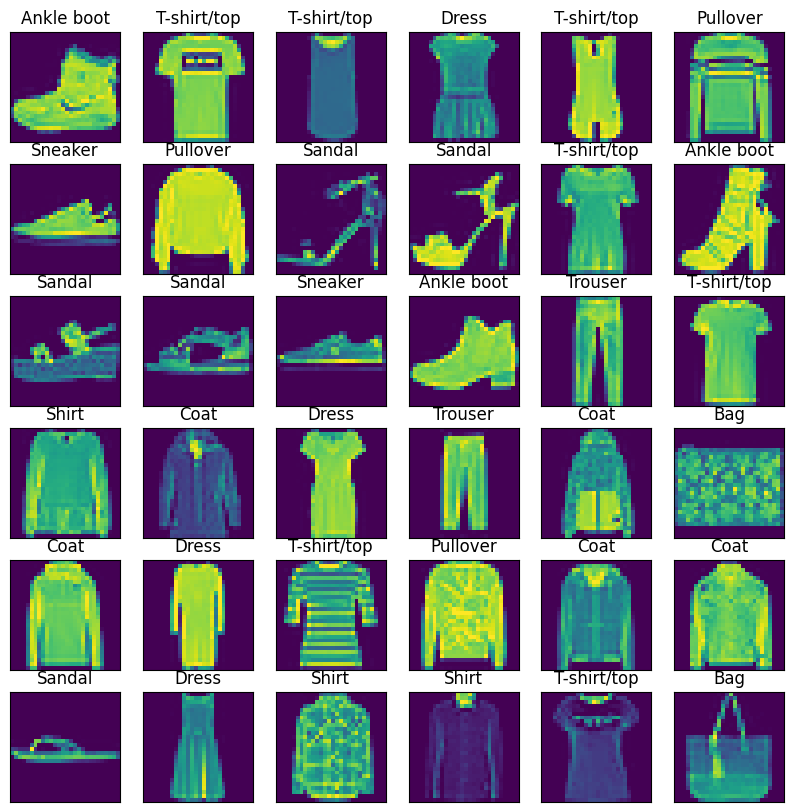

In [7]:
#Create a dictionary for each type of label
labels={0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal',
        6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS,IMG_COLS)))
    label_index=train_labels[i]
    plt.title(labels[label_index])
plt.show()

In [8]:
#One -hot representation of labels
train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [11]:
#define the architecture of cnn
class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes):
        model=Sequential(
            [
                Dense(HIDDEN_NEURONS, input_shape=input_shape,
                      name="Dense_layer1", activation='relu'),
                Dense(HIDDEN_NEURONS,name='Dense_layer2', activation='relu'),
                Dense(classes, name='output_layer',activation='softmax')
            ]
        )
        return model

In [12]:
#initialize the optimizer and model
model=cnn_fmnist.build(input_shape=(RESHAPED,), classes=NUM_CLASSES)
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Dense_layer1 (Dense)                 │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_layer2 (Dense)                 │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Training Parameters
BATCH_SIZE=128
EPOCHS=200
VALIDATION_SPLIT=0.2 #how much of the training set is reserved for validation

In [15]:
from re import VERBOSE
history=model.fit(train_images,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,
                  validation_split=VALIDATION_SPLIT,verbose=1)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7479 - loss: 0.7171 - val_accuracy: 0.8636 - val_loss: 0.3882
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8617 - loss: 0.3829 - val_accuracy: 0.8675 - val_loss: 0.3746
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8739 - loss: 0.3404 - val_accuracy: 0.8754 - val_loss: 0.3478
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8887 - loss: 0.3038 - val_accuracy: 0.8863 - val_loss: 0.3202
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8958 - loss: 0.2823 - val_accuracy: 0.8818 - val_loss: 0.3264
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9015 - loss: 0.2710 - val_accuracy: 0.8821 - val_loss: 0.3273
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9018 - loss: 0.2542 - val_accuracy: 0.8844 - val_loss: 0.3206
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9033 - loss: 0.2520 - val_accu

In [16]:
score=model.evaluate(test_images, test_labels, verbose=1)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8965 - loss: 1.3260
Test loss: 1.3095623254776
Test accuracy: 0.8988999724388123


Text(0.5, 1.0, 'Training - Accuracy')

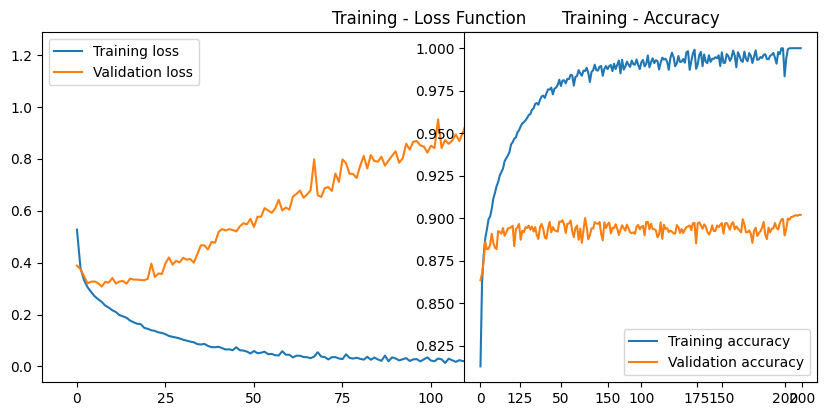

In [17]:
#Plot the loss and accuracy functions for the training and validation sets
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.title('Training - Accuracy')


In [18]:
#get the predictions for the test data, convert to an integer value between 0 and 9
predicted_classes=np.around(model.predict(test_images))
predicted_classes=np.argmax(predicted_classes, axis=1)

#get the indices to be plotted
test_labels=np.argmax(test_labels,axis=1)

correct = np.nonzero(predicted_classes==test_labels)[0]
incorrect = np.nonzero(predicted_classes!=test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


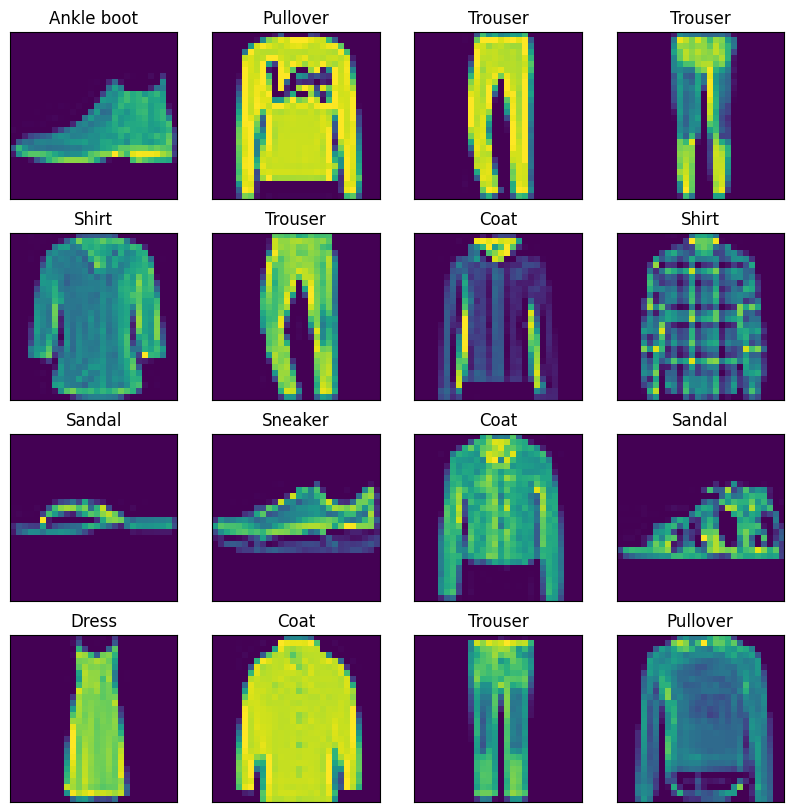

In [19]:
#Plot 16 correctly predicted images and their labels
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[correct].reshape((IMG_ROWS,IMG_COLS)))
    plt.title(labels[test_labels[correct]])
plt.show()

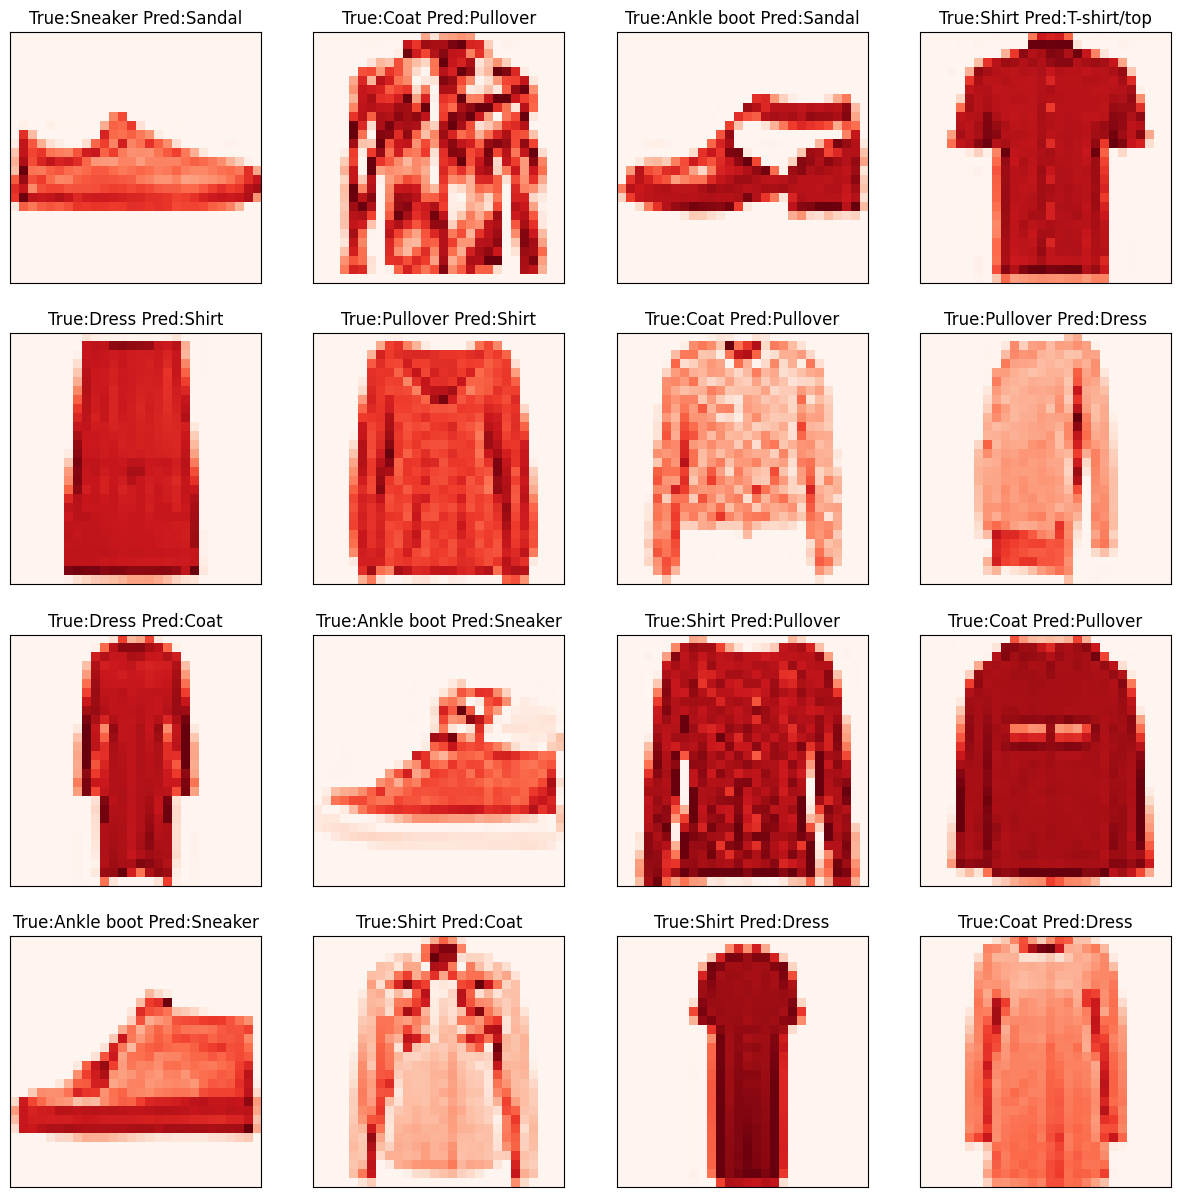

In [23]:
#Plot 16 incorrectly predicted images and their labels

plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[indx].reshape((IMG_ROWS,IMG_COLS)),cmap="Reds")
    plt.title('True:{} Pred:{}'.format(labels[test_labels[indx]],labels[predicted_classes[indx]]))
plt.show()